# <div style="text-align: right"> Назарьин Артем, НПМбд-01-19 </div>

## Домашнее задание 7: Decision Trees

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

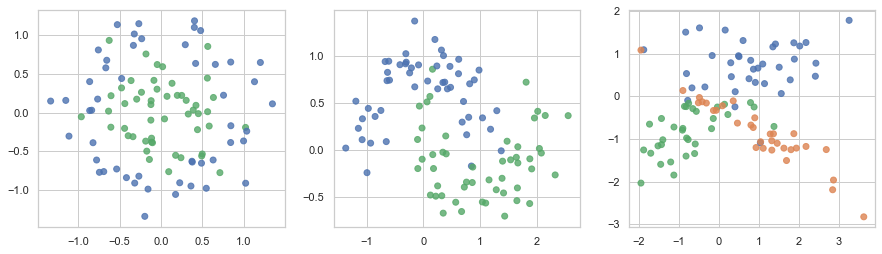

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

Train accuracy 1 = 1.0
Test accuracy 1 = 0.7
Train accuracy 2 = 1.0
Test accuracy 2 = 0.95
Train accuracy 3 = 1.0
Test accuracy 3 = 0.7


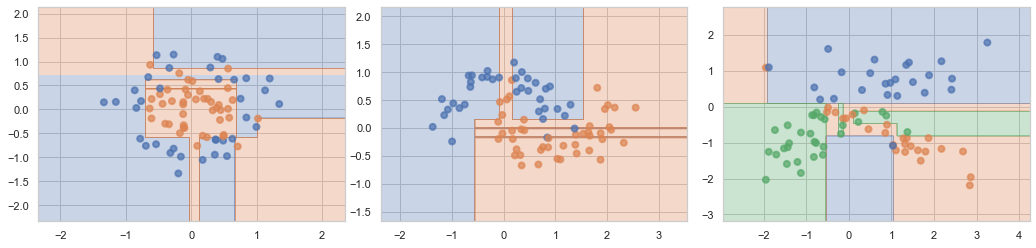

In [6]:
plt.figure(figsize=(15, 4))
def dataset_split(datasets):
    for i, (x, y) in enumerate(datasets):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
        tree_cl = DecisionTreeClassifier().fit(x_train, y_train)
        plt.subplot(1, 3, i + 1)
        plot_surface(tree_cl, x_train, y_train)
        print('Train accuracy', i+1, '=', tree_cl.score(x_train, y_train))
        print('Test accuracy', i+1, '=', tree_cl.score(x_test, y_test))
dataset_split(datasets)

__Ответ:__

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Train accuracy 1 = 0.9375
Test accuracy 1 = 0.7
Train accuracy 2 = 0.9625
Test accuracy 2 = 0.95
Train accuracy 3 = 0.925
Test accuracy 3 = 0.7


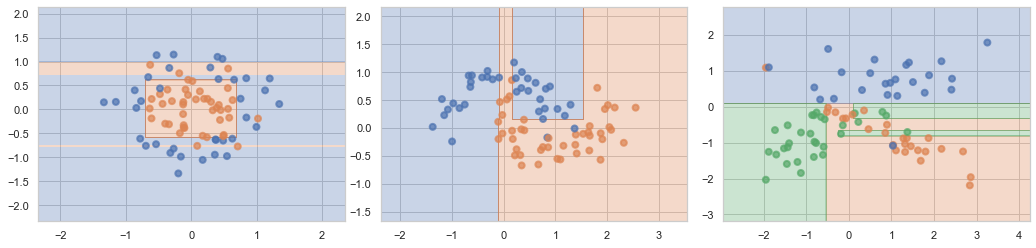

In [7]:
#min_samples_leaf=3
plt.figure(figsize=(15, 4))
def dataset_min_samples_leaf(datasets, k):
    for i, (x, y) in enumerate(datasets):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
        tree_cl = DecisionTreeClassifier(min_samples_leaf=k).fit(x_train, y_train)
        plt.subplot(1, 3, i + 1)
        plot_surface(tree_cl, x_train, y_train)
        print('Train accuracy', i+1, '=', tree_cl.score(x_train, y_train))
        print('Test accuracy', i+1, '=', tree_cl.score(x_test, y_test))
dataset_min_samples_leaf(datasets, 3)

Train accuracy 1 = 0.9125
Test accuracy 1 = 0.85
Train accuracy 2 = 0.95
Test accuracy 2 = 0.8
Train accuracy 3 = 0.9
Test accuracy 3 = 0.7


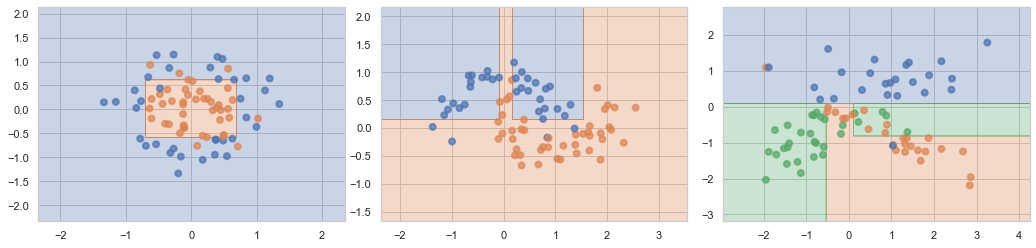

In [8]:
#min_samples_leaf=5
plt.figure(figsize=(15, 4))
dataset_min_samples_leaf(datasets, 5)

Train accuracy 1 = 0.825
Test accuracy 1 = 0.9
Train accuracy 2 = 0.8375
Test accuracy 2 = 0.85
Train accuracy 3 = 0.8875
Test accuracy 3 = 0.75


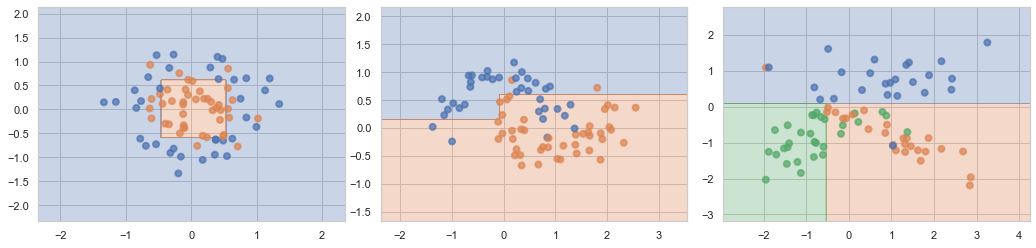

In [9]:
#min_samples_leaf=10
plt.figure(figsize=(15, 4))
dataset_min_samples_leaf(datasets, 10)

Train accuracy 1 = 0.875
Test accuracy 1 = 0.7
Train accuracy 2 = 0.9125
Test accuracy 2 = 1.0
Train accuracy 3 = 0.9
Test accuracy 3 = 0.75


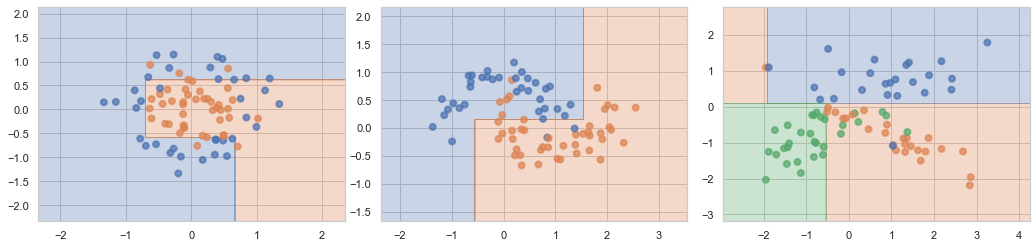

In [52]:
#max_depth=3
plt.figure(figsize=(15, 4))
def dataset_max_depth(datasets, k):
    for i, (x, y) in enumerate(datasets):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
        tree_cl = DecisionTreeClassifier(max_depth=k).fit(x_train, y_train)
        plt.subplot(1, 3, i + 1)
        plot_surface(tree_cl, x_train, y_train)
        print('Train accuracy', i+1, '=', tree_cl.score(x_train, y_train))
        print('Test accuracy', i+1, '=', tree_cl.score(x_test, y_test))
dataset_max_depth(datasets,3)

Train accuracy 1 = 0.975
Test accuracy 1 = 0.7
Train accuracy 2 = 0.9875
Test accuracy 2 = 0.95
Train accuracy 3 = 0.9375
Test accuracy 3 = 0.7


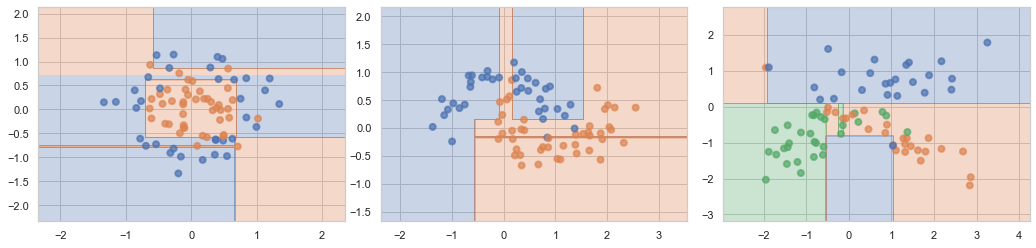

In [49]:
#max_depth=5
plt.figure(figsize=(15, 4))
dataset_max_depth(datasets,5)

Train accuracy 1 = 1.0
Test accuracy 1 = 0.65
Train accuracy 2 = 1.0
Test accuracy 2 = 0.95
Train accuracy 3 = 1.0
Test accuracy 3 = 0.7


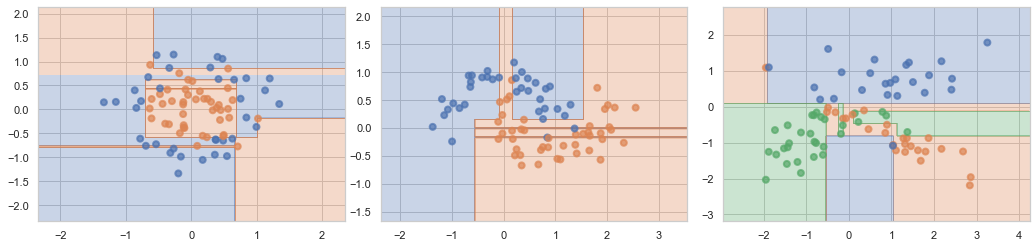

In [50]:
#max_depth=10
plt.figure(figsize=(15, 4))
dataset_max_depth(datasets,10)

__Ответ:__ Точность на обучающей выборке возрастает с увеличением параметра max_depth, но падает с увеличением параметра min_samples_leaf

# 2. Решающие деревья своими руками

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [11]:
mushrooms = pd.read_csv('agaricus-lepiota.csv')

In [12]:
mushrooms.head(10)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [13]:
def label_encoder(table):
    for col in table.columns:
        le = LabelEncoder()
        table.loc[:, col] = le.fit_transform(table.loc[:, col])
label_encoder(mushrooms)
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [64]:
target = mushrooms['p']
features = mushrooms.drop(columns='p')
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.5, random_state=42)
tree_mushrooms = DecisionTreeClassifier().fit(x_train, y_train)
print('Test accuracy:', tree_mushrooms.score(x_test, y_test))
print('Depth:', tree_mushrooms.get_depth())

Test accuracy: 1.0
Depth: 7


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [43]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')

In [44]:
tic_tac_toe.head(10)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
5,x,x,x,x,o,b,o,o,b,positive
6,x,x,x,x,o,b,o,b,o,positive
7,x,x,x,x,o,b,b,o,o,positive
8,x,x,x,x,b,o,o,o,b,positive
9,x,x,x,x,b,o,o,b,o,positive


In [45]:
label_encoder(tic_tac_toe)
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


Text(0.5, 1.0, 'min_samples_leaf')

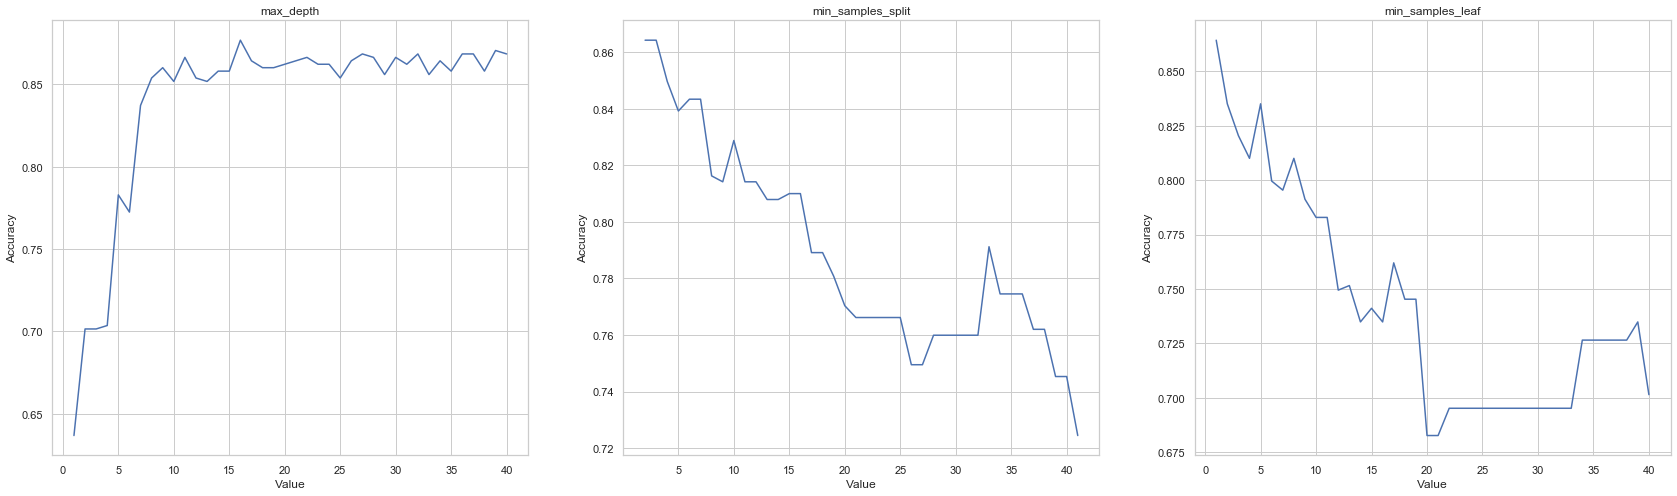

In [62]:
positive_tic_tac_toe = np.array(tic_tac_toe['positive'])
not_positive_tic_tac_toe = np.array(tic_tac_toe.drop('positive', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(not_positive_tic_tac_toe, positive_tic_tac_toe, test_size = 0.5, random_state = 42)

max_depth_acc = []
min_samples_split_acc = []
min_samples_leaf_acc = []

for i in range(40):
    tree_max_depth = DecisionTreeClassifier(max_depth = i + 1).fit(x_train, y_train)
    tree_min_samples_split = DecisionTreeClassifier(min_samples_split = i + 2).fit(x_train, y_train)
    tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = i + 1).fit(x_train, y_train)
    
    max_depth_acc.append(tree_max_depth.score(x_test, y_test))
    min_samples_split_acc.append(tree_min_samples_split.score(x_test, y_test))
    min_samples_leaf_acc.append(tree_min_samples_leaf.score(x_test, y_test))

fig, ax = plt.subplots(1, 3, figsize = (29, 8))

xx = np.arange(1, 41)
xx_min_samples_split_acc = np.arange(2, 42)

ax[0].plot(xx, max_depth_acc)
ax[1].plot(xx_min_samples_split_acc, min_samples_split_acc)
ax[2].plot(xx, min_samples_leaf_acc)

ax[0].set_xlabel('Value')
ax[1].set_xlabel('Value')
ax[2].set_xlabel('Value')

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Accuracy')
ax[2].set_ylabel('Accuracy')

ax[0].set_title('max_depth')
ax[1].set_title('min_samples_split')
ax[2].set_title('min_samples_leaf')

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [54]:
cars = pd.read_csv('car.csv')
nursery = pd.read_csv('nursery.csv')    

In [55]:
cars.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [56]:
mask = (cars.loc[:, 'unacc'] == 'unacc').values
cars.loc[:, 'unacc'][mask] = 'acc'
mask = (cars.loc[:, 'unacc'] == 'vgood').values
cars.loc[:, 'unacc'][mask] = 'good'

In [57]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,acc
1,vhigh,vhigh,2,2,small,high,acc
2,vhigh,vhigh,2,2,med,low,acc
3,vhigh,vhigh,2,2,med,med,acc
4,vhigh,vhigh,2,2,med,high,acc


In [58]:
label_encoder(cars)
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


In [63]:
cars_unacc = np.array(cars['unacc'])
not_cars_unacc = np.array(cars.drop('unacc', axis = 1))

In [59]:
nursery.head(5)

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [60]:
mask = (nursery.loc[:, 'recommend'] == 'not_recom').values
nursery.loc[:, 'recommend'][mask] = 'recommend'
mask = (nursery.loc[:, 'recommend'] == 'very_recom').values
nursery.loc[:, 'recommend'][mask] = 'priority'
mask = (nursery.loc[:, 'recommend'] == 'spec_prior').values
nursery.loc[:, 'recommend'][mask] = 'priority'

In [61]:
label_encoder(nursery)
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1


In [66]:
nursery_rec = np.array(nursery['recommend'])
not_nursery_rec = np.array(nursery.drop('recommend', axis = 1))

In [70]:
def dataset_accuracy(x,y):
    return cross_val_score(DecisionTreeClassifier(), x, y, cv = 10).mean()

print('mushrooms accuracy =', dataset_accuracy(features, target))
print('tic tac toe accuracy =', dataset_accuracy(not_positive_tic_tac_toe, positive_tic_tac_toe))
print('cars accuracy =', dataset_accuracy(not_cars_unacc, cars_unacc))
print('nursery accuracy =', dataset_accuracy(not_nursery_rec, nursery_rec))

mushrooms accuracy = 0.9582898587606566
tic tac toe accuracy = 0.7443859649122807
cars accuracy = 0.9443708831832234
nursery accuracy = 0.9998456790123458
